In [1]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

# Plotting packs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#NLP packs
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from textblob import TextBlob , Word
import re 
import string


##Wordcloud Modules
from wordcloud import WordCloud , STOPWORDS

#Machine learning Packs
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## EDA

In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')
df=train.append(test)

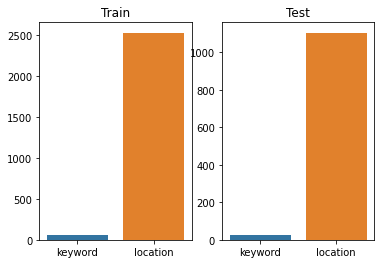

In [3]:
fig = plt.figure()
fig.add_subplot(121)
sns.barplot(x=train[['keyword', 'location']].isna().sum().index.values, y= train[['keyword', 'location']].isna().sum().values)
plt.title('Train');

fig.add_subplot(122)
sns.barplot(x=test[['keyword', 'location']].isna().sum().index.values, y= test[['keyword', 'location']].isna().sum().values)
plt.title('Test');

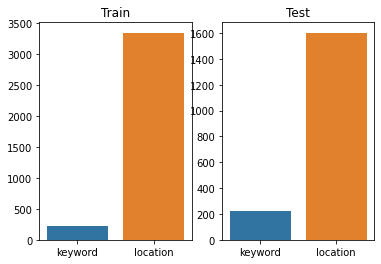

In [4]:
fig = plt.figure()
fig.add_subplot(121)
sns.barplot(x=train[['keyword', 'location']].nunique().index.values, y= train[['keyword', 'location']].nunique().values)
plt.title('Train');

fig.add_subplot(122)
sns.barplot(x=test[['keyword', 'location']].nunique().index.values, y= test[['keyword', 'location']].nunique().values)
plt.title('Test');

Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Missing values in those features are filled with **no_keyword** and **no_location** respectively.

<AxesSubplot:xlabel='count', ylabel='keyword'>

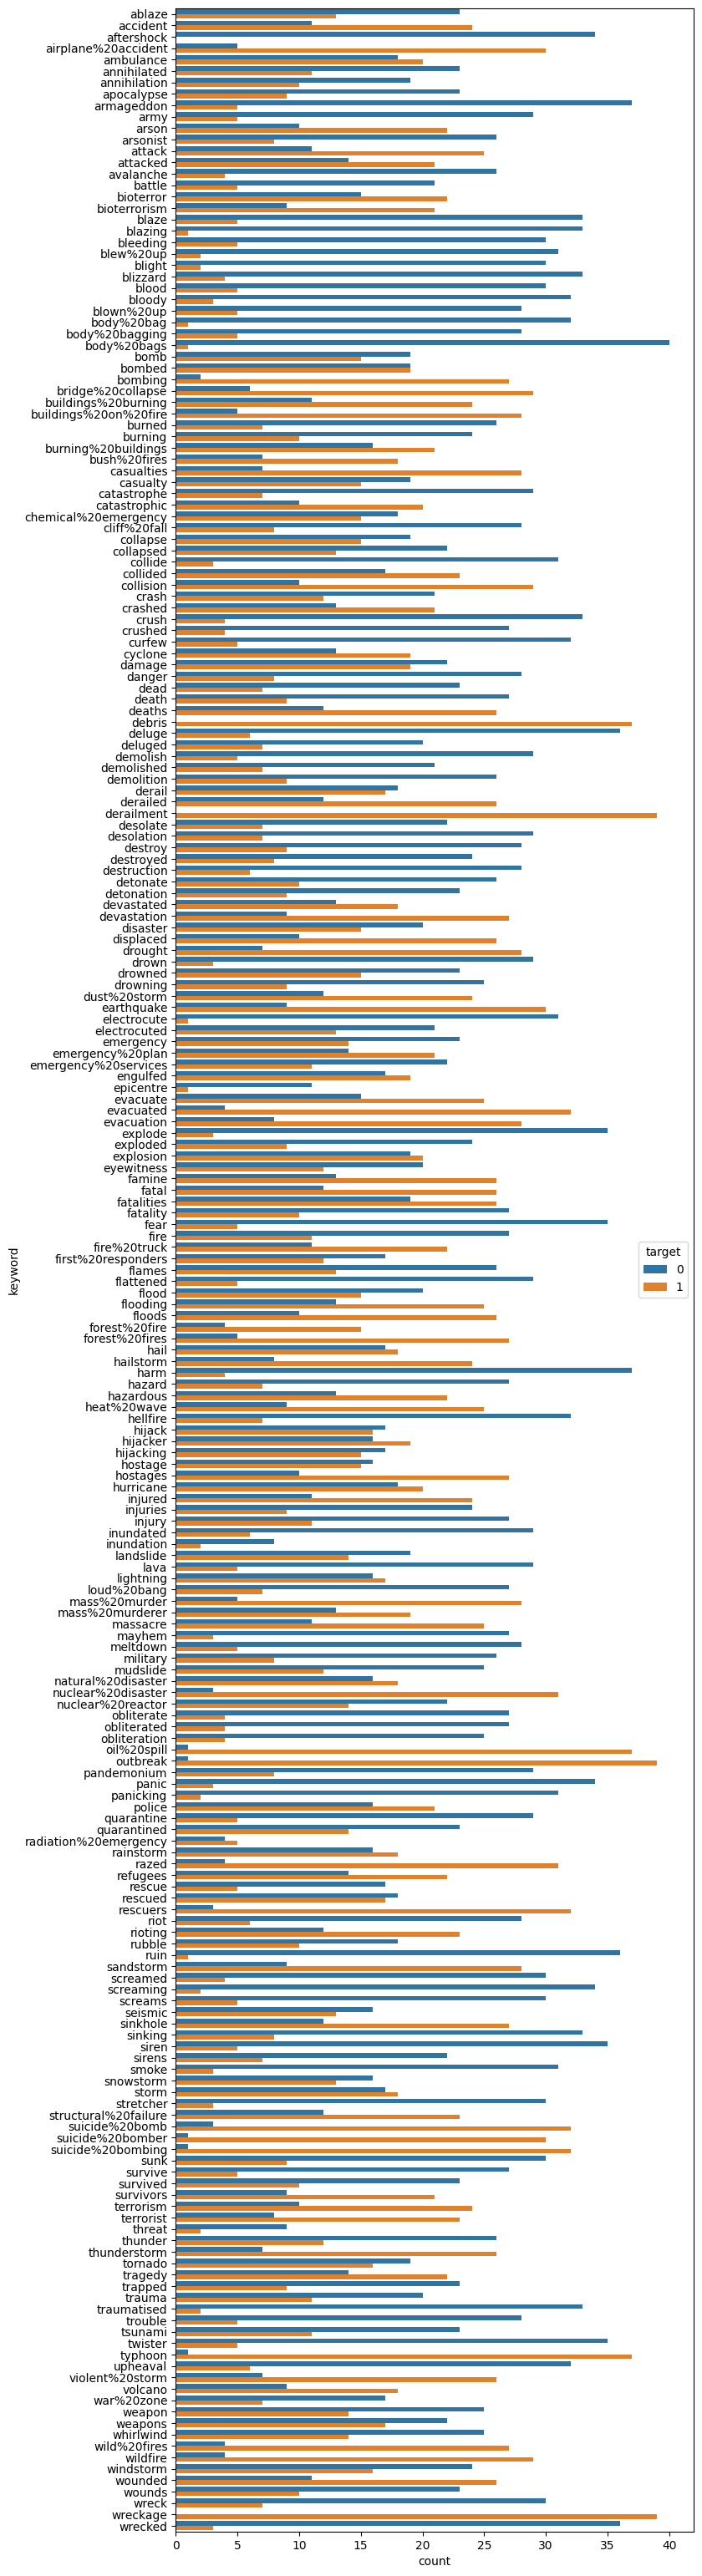

In [5]:
plt.figure(figsize=(8, 40), dpi=100)
sns.countplot(y=train['keyword'], hue=train['target'])

<AxesSubplot:xlabel='keyword'>

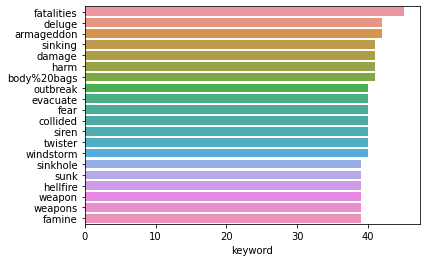

In [6]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20], orient='h')

In [7]:
train.loc[train['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

<AxesSubplot:xlabel='location'>

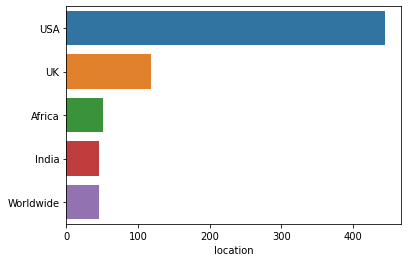

In [8]:
# Replacing the ambigious locations name with Standard names
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

## Missing Value

In [9]:
df.loc[df.keyword.isnull(), 'keyword'] = 'no_keyword'
df.loc[df.location.isnull(), 'location'] = 'no_location'

## Find Best

In [10]:
df['text']=df['text'].str.lower().str.replace('[^\w\s]','').str.replace('\d+','').str.replace('\n',' ').replace('\r','').str.replace("[^a-zA-Z0-9\s]",'') 

In [11]:
from nltk.stem import SnowballStemmer 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS

df['text'] = df['text'].apply(lambda x : word_tokenize(x.lower())) # cumle -> words
df["text"] = df["text"].apply(lambda x : [word for word in x if word not in STOPWORDS]) # stop words cikarma
df["text"] = df["text"].apply(lambda x : [SnowballStemmer("english").stem(word) for word in x]) # kelimelerin kok halleri
df["text"] = df["text"].apply(lambda x : " ".join(x)) # kelimleri birleştirdik
df["Polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity) # ardindan countplot guzel olur
df["Subjectivity"] = df["text"].apply(lambda x : TextBlob(x).sentiment.subjectivity) # subjectivity hesaplama

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

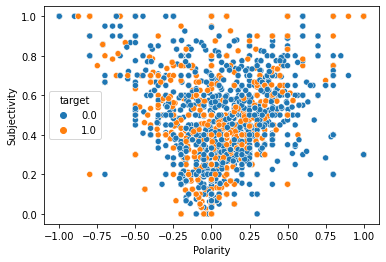

In [12]:
sns.scatterplot(x='Polarity', y='Subjectivity', hue='target', data=df[:train.shape[0]])

In [13]:
df_train = df[:train.shape[0]]
df_test = df[train.shape[0]:]

In [14]:
df_train

,id,keyword,location,text,target,Polarity,Subjectivity
0,1,no_keyword,no_location,deed reason earthquak may allah forgiv us,1.0,0.000000,0.000000
1,4,no_keyword,no_location,forest fire near la rong sask canada,1.0,0.100000,0.400000
2,5,no_keyword,no_location,resid ask shelter place notifi offic evacu she...,1.0,0.000000,0.000000
3,6,no_keyword,no_location,peopl receiv wildfir evacu order california,1.0,0.000000,0.000000
4,7,no_keyword,no_location,got sent photo rubi alaska smoke wildfir pour ...,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...
7608,10869,no_keyword,no_location,two giant crane hold bridg collaps nearbi home...,1.0,0.000000,1.000000
7609,10870,no_keyword,no_location,ariaahrari thetawniest control wild fire calif...,1.0,0.100000,0.400000
7610,10871,no_keyword,no_location,m utckm s volcano hawaii httptcozdtoydebj,1.0,0.000000,0.000000
7611,10872,no_keyword,no_location,polic investig ebik collid car littl portug eb...,1.0,-0.333333,0.666667


In [15]:
def nlp_analysis(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
    
    vectorizers=[CountVectorizer(), TfidfVectorizer()]
    ngrams = [(1,1), (1,2)]
    
    classifiers=[LogisticRegression(), KNeighborsClassifier(3), DecisionTreeClassifier(), RandomForestClassifier(),
    AdaBoostClassifier(), GradientBoostingClassifier(), MultinomialNB(), BernoulliNB(), XGBClassifier()]
    
    col_names = ['Classifier','Methods', 'N-Grams','Accuracy','Precision','Recall', 'F1']
    df_nlp = pd.DataFrame(columns=col_names)   

    for i in vectorizers:
        vec=i
        vec_name = i.__class__.__name__
        vec.stop_words='english'
        vec.min_df=0.005
        
        for j in ngrams:
            vec.ngram_range=j
            X_train_dtm = vec.fit_transform(X_train)
            X_test_dtm = vec.transform(X_test)
            
            for k in classifiers:
                pred = k.fit(X_train_dtm, y_train).predict(X_test_dtm)
                clas_name = k.__class__.__name__
                
                accuracy = accuracy_score(y_test, pred)
                precision = precision_score(y_test, pred, average='weighted')
                f1 = f1_score(y_test, pred, average='weighted')
                recall = recall_score(y_test, pred, average='weighted')
                
                df_entry = pd.DataFrame([[clas_name, vec_name, j, accuracy*100, precision*100, recall*100, f1*100]], 
                                        columns=col_names)
                df_nlp=df_nlp.append(df_entry)
    return df_nlp

In [16]:
nlp_analysis(df_train.text, df_train.target).sort_values(by='F1', ascending=False)

,Classifier,Methods,N-Grams,Accuracy,Precision,Recall,F1
0,XGBClassifier,CountVectorizer,"(1, 2)",75.574524,75.985553,75.574524,74.847901
0,XGBClassifier,CountVectorizer,"(1, 1)",75.443204,75.798906,75.443204,74.738921
0,RandomForestClassifier,TfidfVectorizer,"(1, 2)",74.917925,74.761757,74.917925,74.685943
0,XGBClassifier,TfidfVectorizer,"(1, 1)",75.311884,75.615271,75.311884,74.629770
0,XGBClassifier,TfidfVectorizer,"(1, 2)",75.246225,75.660991,75.246225,74.489694
0,LogisticRegression,TfidfVectorizer,"(1, 1)",74.786605,74.695743,74.786605,74.403945
0,LogisticRegression,TfidfVectorizer,"(1, 2)",74.786605,74.711221,74.786605,74.383394
0,RandomForestClassifier,TfidfVectorizer,"(1, 1)",74.523966,74.358688,74.523966,74.288340
0,LogisticRegression,CountVectorizer,"(1, 2)",74.523966,74.547343,74.523966,73.994641
0,LogisticRegression,CountVectorizer,"(1, 1)",74.392646,74.363275,74.392646,73.906684


## Prediction

In [17]:
cv = CountVectorizer(min_df=0.005, ngram_range=(1,2), stop_words='english')
train_dtm=cv.fit_transform(df_train.text)
test_dtm=cv.transform(df_test.text) # labelsiz

In [18]:
xgbc=XGBClassifier()
xgbc.fit(train_dtm, df_train.target)
pred=xgbc.predict(test_dtm)
pred

array([1, 1, 1, ..., 0, 1, 0])

In [19]:
submission=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
submission['target'] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
